In [2]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 41kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=32a11bcd503ec66c392199cfb05a93c5d42144cf2f7b096ff6275e75af3184ac
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [3]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data,exposure
import cv2

In [17]:
image=cv2.imread("/al_pacino.jpg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [18]:
fd,hog_image=hog(image,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,multichannel=True)

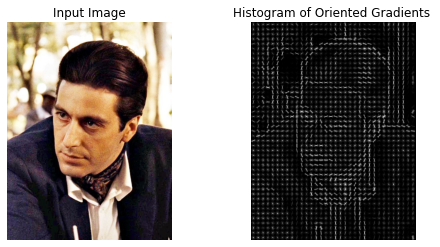

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)
ax1.axis("off")
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title("Input Image")
hog_image_rescaled=exposure.rescale_intensity(hog_image,in_range=(0,10))
ax2.axis("off")
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title("Histogram of Oriented Gradients ")
plt.show()

In [20]:
len(fd)

12240

In [21]:
image.shape

(720, 546, 3)

 **Face Detection** 

In [22]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2


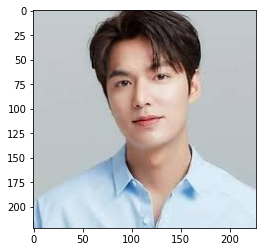

In [28]:
image=cv2.imread("/lee_min_ho.jfif")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [29]:
face_locations=face_recognition.face_locations(image)
number_of_faces=len(face_locations)
print("Found{} face(s) in input image.",format(number_of_faces))

Found{} face(s) in input image. 1


A face is located at pixel location Top:66,Left:36,Bottom:155,Right:126


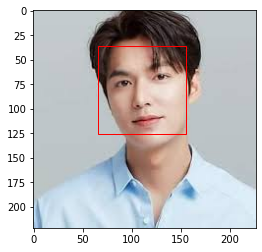

In [30]:
plt.imshow(image)
ax=plt.gca()
for face_location in face_locations:
  top,right,bottom,left=face_location
  x,y,w,h=left,top,right,bottom
  print("A face is located at pixel location Top:{},Left:{},Bottom:{},Right:{}".format(x,y,w,h))
  rect=Rectangle((x,y),w-x,h-y,fill=False,color="red")
  ax.add_patch(rect)
plt.show()  


**Face** **Recognition**


In [32]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [37]:

image=cv2.imread("/al_pacino.jpg")
pacino=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=cv2.imread("/lee_min_ho.jfif")
minho=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=cv2.imread("/kaka.jpg")
ricardo=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

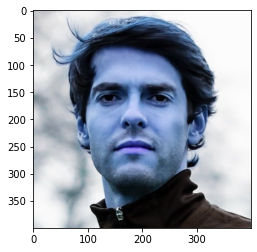

In [41]:
image=cv2.imread("/kaka.jpg")
ricardo=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [44]:

face_pacino_encoding=face_recognition.face_encodings(pacino)[0]
face_minho_encoding=face_recognition.face_encodings(minho)[0]
face_ricardo_encoding=face_recognition.face_encodings(ricardo)[0]

known_face_encodings=[face_pacino_encoding,
                      face_minho_encoding,
                      face_ricardo_encoding]

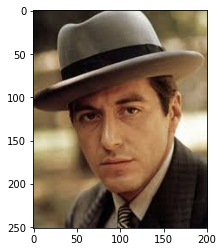

In [52]:
image=cv2.imread("/michael_corleone.jfif")
unknown_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

unknown_face_encodings=face_recognition.face_encodings(unknown_image)

In [53]:
from scipy.spatial import distance
for unknown_face_encoding in unknown_face_encodings:
  results=[]
  for known_face_encoding in known_face_encodings:
    d=distance.euclidean(known_face_encoding,unknown_face_encoding)
    print("Euclidean distance is :",d)
    results.append(d)
  threshold=0.6
  results=np.array(results) <=threshold
  name="Unknown"
  if results[0]:
    name="Al Pacino"
  elif results[1]:
    name="Lee min ho"
  elif results[2]:
     name="Ricardo Kaka"
  print(f"found {name} in the photo !")     

Euclidean distance is : 0.5427005346562441
Euclidean distance is : 0.7916645040979572
Euclidean distance is : 0.8093201816078919
found Al Pacino in the photo !


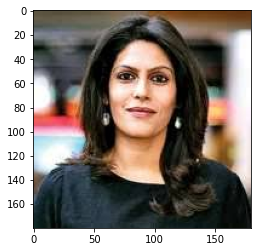

In [55]:
image=cv2.imread("/palki.jfif")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [64]:
face_landmarks_list=face_recognition.face_landmarks(image)

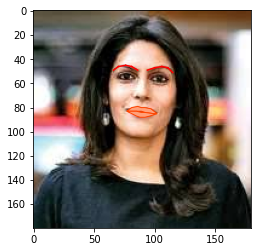

In [66]:

import matplotlib.lines as mlines
from matplotlib.patches import Polygon
plt.imshow(image)
ax=plt.gca()
for face_landmarks in face_landmarks_list:
  left_eyebrow_pts=face_landmarks["left_eyebrow"]
  pre_x,pre_y=left_eyebrow_pts[0]
  for (x,y) in left_eyebrow_pts[1:]:
    l=mlines.Line2D([pre_x,x],[pre_y,y],color="red")
    ax.add_line(l)
    pre_x,pre_y=x,y
  right_eyebrow_pts=face_landmarks["right_eyebrow"]
  pre_x,pre_y=right_eyebrow_pts[0]
  for (x,y) in right_eyebrow_pts[1:]:  
    l=mlines.Line2D([pre_x,x],[pre_y,y],color="red")
    ax.add_line(l)
    pre_x,pre_y=x,y
  p=Polygon(face_landmarks["top_lip"],facecolor="lightsalmon",edgecolor="orangered")
  ax.add_patch(p)
  p=Polygon(face_landmarks["bottom_lip"],facecolor="lightsalmon",edgecolor="orangered")
  ax.add_patch(p)
plt.show()  
